Code to train an Policy Gradient agent to navigate to a target in a continuous 2D arena
Code by: M Ganesh Kumar & Blake Bordeleon
Date: 02/15/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from backend import TwoDimNav, plot_maps, get_onehot_action
import jax.numpy as jnp
from jax_backend import *

In [2]:
#initialize environment
train_episodes = 1000
tmax = 100
goalsize = 0.25
startcoord = [0.0,0.0]
goalcoord = [0.7, 0.7]
testgoalcoord = [-0.7,-0.7]

env = TwoDimNav(startcoord=startcoord, goalcoord=goalcoord, goalsize=goalsize, tmax=tmax)

[0.0, 0.0]


In [3]:
# initialize agent
alr = 0.001  # 0.005

nact = 4
gamma = 0.95
normreward = False # whether to normalize reward for policy gradient

npc = 21
pc_sigma = 0.25
seed = 2023

params = get_parameters(npc, nact, random.PRNGKey(seed), scale=pc_sigma)
initparams = params.copy()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-02-15 20:51:15.600261: W pjrt_plugin/src/mps_client.cc:535] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


In [4]:
# inner loop training loop
def run_trial(params, env):
    coords = []
    actions = []
    rewards = []

    state, goal, eucdist, done = env.reset()

    for t in range(tmax):

        pcact = predict_placecell(params, state[None,:])

        aprob = predict_action(params, pcact)

        onehotg = get_onehot_action(aprob)

        newstate, eucdist, done = env.step(onehotg) 

        reward = int(done)

        coords.append(state)
        actions.append(onehotg)
        rewards.append(reward)

        state = newstate.copy()

        if done:
            print(f'Target reached at {t} step')
            break

    #print(f'Trial {t+1}/ {train_episodes}, R {done}, t {t}')

    return jnp.array(coords), jnp.array(rewards), jnp.array(actions), t

[0.0, 0.0]
Target reached at 46 step


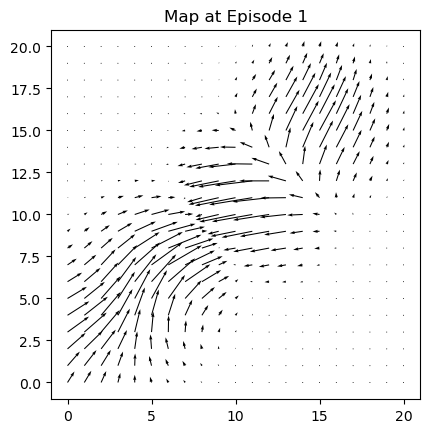

E 1/1000 in 46 steps
Target reached at 64 step
E 2/1000 in 64 steps
E 3/1000 in 99 steps
E 4/1000 in 99 steps
Target reached at 89 step
E 5/1000 in 89 steps
E 6/1000 in 99 steps
E 7/1000 in 99 steps
Target reached at 29 step
E 8/1000 in 29 steps
E 9/1000 in 99 steps
E 10/1000 in 99 steps
Target reached at 15 step
E 11/1000 in 15 steps
Target reached at 10 step
E 12/1000 in 10 steps
E 13/1000 in 99 steps
E 14/1000 in 99 steps
E 15/1000 in 99 steps
Target reached at 39 step
E 16/1000 in 39 steps
Target reached at 33 step
E 17/1000 in 33 steps
E 18/1000 in 99 steps
Target reached at 72 step
E 19/1000 in 72 steps
E 20/1000 in 99 steps
Target reached at 42 step
E 21/1000 in 42 steps
E 22/1000 in 99 steps
Target reached at 52 step
E 23/1000 in 52 steps
Target reached at 27 step
E 24/1000 in 27 steps
E 25/1000 in 99 steps
E 26/1000 in 99 steps
E 27/1000 in 99 steps
Target reached at 24 step
E 28/1000 in 24 steps
E 29/1000 in 99 steps
E 30/1000 in 99 steps
Target reached at 15 step
E 31/1000 i

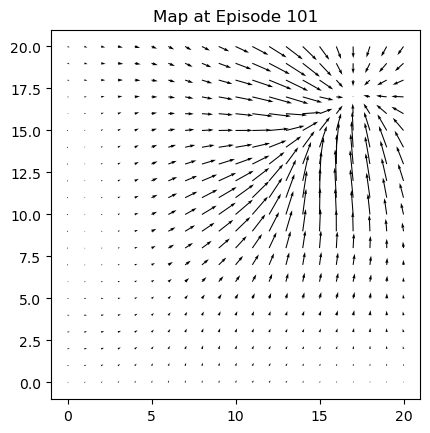

E 101/1000 in 21 steps
Target reached at 10 step
E 102/1000 in 10 steps
Target reached at 10 step
E 103/1000 in 10 steps
Target reached at 11 step
E 104/1000 in 11 steps
Target reached at 24 step
E 105/1000 in 24 steps
Target reached at 11 step
E 106/1000 in 11 steps
Target reached at 8 step
E 107/1000 in 8 steps
Target reached at 9 step
E 108/1000 in 9 steps
Target reached at 9 step
E 109/1000 in 9 steps
Target reached at 22 step
E 110/1000 in 22 steps
Target reached at 19 step
E 111/1000 in 19 steps
Target reached at 17 step
E 112/1000 in 17 steps
Target reached at 9 step
E 113/1000 in 9 steps
Target reached at 9 step
E 114/1000 in 9 steps
Target reached at 18 step
E 115/1000 in 18 steps
Target reached at 37 step
E 116/1000 in 37 steps
Target reached at 22 step
E 117/1000 in 22 steps
Target reached at 26 step
E 118/1000 in 26 steps
Target reached at 9 step
E 119/1000 in 9 steps
Target reached at 21 step
E 120/1000 in 21 steps
Target reached at 40 step
E 121/1000 in 40 steps
Target re

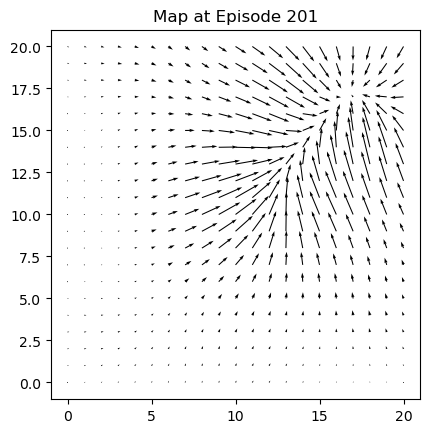

E 201/1000 in 9 steps
Target reached at 21 step
E 202/1000 in 21 steps
Target reached at 18 step
E 203/1000 in 18 steps
Target reached at 10 step
E 204/1000 in 10 steps
Target reached at 9 step
E 205/1000 in 9 steps
Target reached at 16 step
E 206/1000 in 16 steps
Target reached at 9 step
E 207/1000 in 9 steps
Target reached at 24 step
E 208/1000 in 24 steps
Target reached at 13 step
E 209/1000 in 13 steps
Target reached at 20 step
E 210/1000 in 20 steps
Target reached at 11 step
E 211/1000 in 11 steps
Target reached at 11 step
E 212/1000 in 11 steps
Target reached at 14 step
E 213/1000 in 14 steps
Target reached at 14 step
E 214/1000 in 14 steps
Target reached at 18 step
E 215/1000 in 18 steps
Target reached at 10 step
E 216/1000 in 10 steps
Target reached at 18 step
E 217/1000 in 18 steps
Target reached at 29 step
E 218/1000 in 29 steps
Target reached at 9 step
E 219/1000 in 9 steps
Target reached at 9 step
E 220/1000 in 9 steps
Target reached at 43 step
E 221/1000 in 43 steps
Target

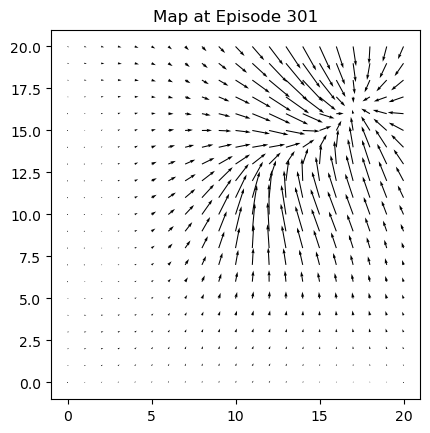

E 301/1000 in 13 steps
Target reached at 63 step
E 302/1000 in 63 steps
Target reached at 16 step
E 303/1000 in 16 steps
Target reached at 17 step
E 304/1000 in 17 steps
Target reached at 20 step
E 305/1000 in 20 steps
Target reached at 19 step
E 306/1000 in 19 steps
Target reached at 16 step
E 307/1000 in 16 steps
E 308/1000 in 99 steps
Target reached at 39 step
E 309/1000 in 39 steps
Target reached at 21 step
E 310/1000 in 21 steps
Target reached at 39 step
E 311/1000 in 39 steps
Target reached at 33 step
E 312/1000 in 33 steps
Target reached at 10 step
E 313/1000 in 10 steps
Target reached at 11 step
E 314/1000 in 11 steps
Target reached at 10 step
E 315/1000 in 10 steps
Target reached at 13 step
E 316/1000 in 13 steps
Target reached at 9 step
E 317/1000 in 9 steps
Target reached at 9 step
E 318/1000 in 9 steps
Target reached at 12 step
E 319/1000 in 12 steps
Target reached at 9 step
E 320/1000 in 9 steps
Target reached at 10 step
E 321/1000 in 10 steps
Target reached at 9 step
E 32

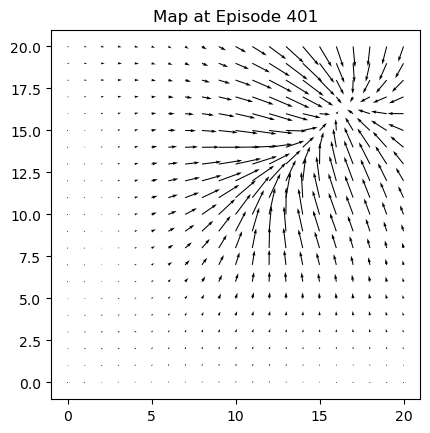

E 401/1000 in 8 steps
Target reached at 8 step
E 402/1000 in 8 steps
Target reached at 9 step
E 403/1000 in 9 steps
Target reached at 8 step
E 404/1000 in 8 steps
Target reached at 16 step
E 405/1000 in 16 steps
Target reached at 8 step
E 406/1000 in 8 steps
Target reached at 8 step
E 407/1000 in 8 steps
Target reached at 8 step
E 408/1000 in 8 steps
Target reached at 8 step
E 409/1000 in 8 steps
Target reached at 8 step
E 410/1000 in 8 steps
Target reached at 18 step
E 411/1000 in 18 steps
Target reached at 9 step
E 412/1000 in 9 steps
Target reached at 9 step
E 413/1000 in 9 steps
Target reached at 9 step
E 414/1000 in 9 steps
Target reached at 13 step
E 415/1000 in 13 steps
Target reached at 8 step
E 416/1000 in 8 steps
Target reached at 8 step
E 417/1000 in 8 steps
Target reached at 9 step
E 418/1000 in 9 steps
Target reached at 16 step
E 419/1000 in 16 steps
Target reached at 10 step
E 420/1000 in 10 steps
Target reached at 15 step
E 421/1000 in 15 steps
Target reached at 10 step


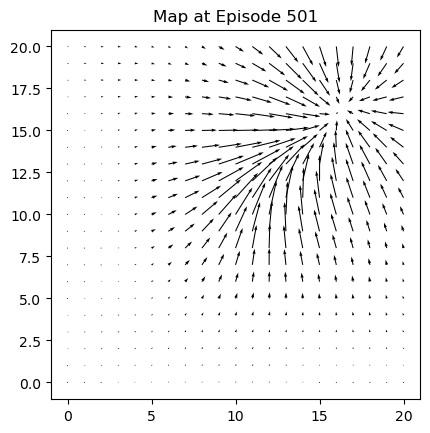

E 501/1000 in 20 steps
Target reached at 8 step
E 502/1000 in 8 steps
Target reached at 13 step
E 503/1000 in 13 steps
Target reached at 8 step
E 504/1000 in 8 steps
Target reached at 8 step
E 505/1000 in 8 steps
Target reached at 8 step
E 506/1000 in 8 steps
Target reached at 10 step
E 507/1000 in 10 steps
Target reached at 16 step
E 508/1000 in 16 steps
Target reached at 9 step
E 509/1000 in 9 steps
Target reached at 8 step
E 510/1000 in 8 steps
Target reached at 8 step
E 511/1000 in 8 steps
Target reached at 14 step
E 512/1000 in 14 steps
Target reached at 15 step
E 513/1000 in 15 steps
Target reached at 18 step
E 514/1000 in 18 steps
Target reached at 18 step
E 515/1000 in 18 steps
Target reached at 9 step
E 516/1000 in 9 steps
Target reached at 10 step
E 517/1000 in 10 steps
Target reached at 8 step
E 518/1000 in 8 steps
Target reached at 9 step
E 519/1000 in 9 steps
Target reached at 10 step
E 520/1000 in 10 steps
Target reached at 11 step
E 521/1000 in 11 steps
Target reached at

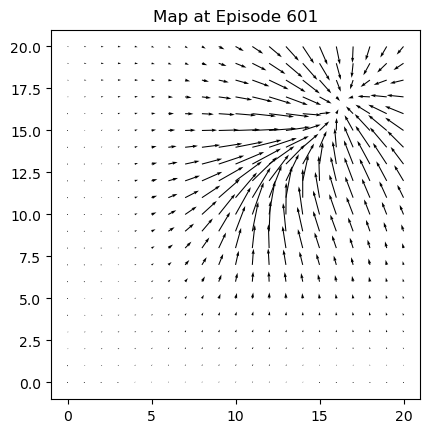

E 601/1000 in 9 steps
Target reached at 15 step
E 602/1000 in 15 steps
Target reached at 9 step
E 603/1000 in 9 steps
Target reached at 9 step
E 604/1000 in 9 steps
Target reached at 13 step
E 605/1000 in 13 steps
Target reached at 9 step
E 606/1000 in 9 steps
Target reached at 8 step
E 607/1000 in 8 steps
Target reached at 28 step
E 608/1000 in 28 steps
Target reached at 8 step
E 609/1000 in 8 steps
Target reached at 9 step
E 610/1000 in 9 steps
Target reached at 9 step
E 611/1000 in 9 steps
Target reached at 18 step
E 612/1000 in 18 steps
Target reached at 9 step
E 613/1000 in 9 steps
Target reached at 8 step
E 614/1000 in 8 steps
Target reached at 8 step
E 615/1000 in 8 steps
Target reached at 15 step
E 616/1000 in 15 steps
Target reached at 9 step
E 617/1000 in 9 steps
Target reached at 9 step
E 618/1000 in 9 steps
Target reached at 15 step
E 619/1000 in 15 steps
Target reached at 9 step
E 620/1000 in 9 steps
Target reached at 10 step
E 621/1000 in 10 steps
Target reached at 10 ste

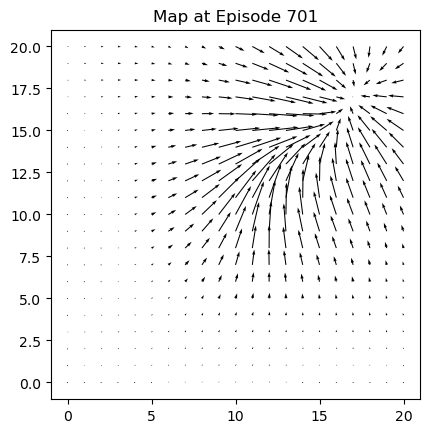

E 701/1000 in 9 steps
Target reached at 9 step
E 702/1000 in 9 steps
Target reached at 9 step
E 703/1000 in 9 steps
Target reached at 8 step
E 704/1000 in 8 steps
Target reached at 8 step
E 705/1000 in 8 steps
Target reached at 9 step
E 706/1000 in 9 steps
Target reached at 8 step
E 707/1000 in 8 steps
Target reached at 9 step
E 708/1000 in 9 steps
Target reached at 15 step
E 709/1000 in 15 steps
Target reached at 9 step
E 710/1000 in 9 steps
Target reached at 9 step
E 711/1000 in 9 steps
Target reached at 13 step
E 712/1000 in 13 steps
Target reached at 8 step
E 713/1000 in 8 steps
Target reached at 15 step
E 714/1000 in 15 steps
Target reached at 9 step
E 715/1000 in 9 steps
Target reached at 9 step
E 716/1000 in 9 steps
Target reached at 32 step
E 717/1000 in 32 steps
Target reached at 8 step
E 718/1000 in 8 steps
Target reached at 10 step
E 719/1000 in 10 steps
Target reached at 8 step
E 720/1000 in 8 steps
Target reached at 9 step
E 721/1000 in 9 steps
Target reached at 8 step
E 7

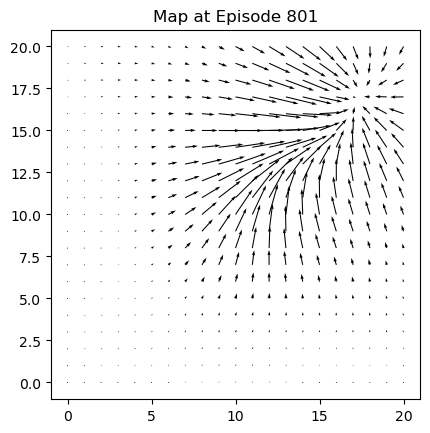

E 801/1000 in 17 steps
Target reached at 18 step
E 802/1000 in 18 steps
Target reached at 9 step
E 803/1000 in 9 steps
Target reached at 8 step
E 804/1000 in 8 steps
Target reached at 19 step
E 805/1000 in 19 steps
Target reached at 9 step
E 806/1000 in 9 steps
Target reached at 9 step
E 807/1000 in 9 steps
Target reached at 8 step
E 808/1000 in 8 steps
Target reached at 9 step
E 809/1000 in 9 steps
Target reached at 14 step
E 810/1000 in 14 steps
Target reached at 8 step
E 811/1000 in 8 steps
Target reached at 8 step
E 812/1000 in 8 steps
Target reached at 8 step
E 813/1000 in 8 steps
Target reached at 8 step
E 814/1000 in 8 steps
Target reached at 8 step
E 815/1000 in 8 steps
Target reached at 8 step
E 816/1000 in 8 steps
Target reached at 8 step
E 817/1000 in 8 steps
Target reached at 8 step
E 818/1000 in 8 steps
Target reached at 8 step
E 819/1000 in 8 steps
Target reached at 8 step
E 820/1000 in 8 steps
Target reached at 8 step
E 821/1000 in 8 steps
Target reached at 8 step
E 822/

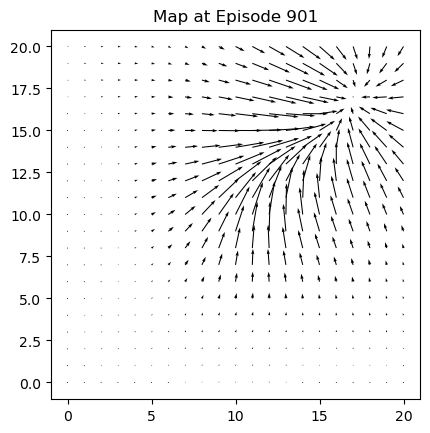

E 901/1000 in 8 steps
Target reached at 23 step
E 902/1000 in 23 steps
Target reached at 8 step
E 903/1000 in 8 steps
Target reached at 9 step
E 904/1000 in 9 steps
Target reached at 8 step
E 905/1000 in 8 steps
Target reached at 8 step
E 906/1000 in 8 steps
Target reached at 8 step
E 907/1000 in 8 steps
Target reached at 8 step
E 908/1000 in 8 steps
Target reached at 10 step
E 909/1000 in 10 steps
Target reached at 9 step
E 910/1000 in 9 steps
Target reached at 9 step
E 911/1000 in 9 steps
Target reached at 9 step
E 912/1000 in 9 steps
Target reached at 10 step
E 913/1000 in 10 steps
Target reached at 8 step
E 914/1000 in 8 steps
Target reached at 9 step
E 915/1000 in 9 steps
Target reached at 8 step
E 916/1000 in 8 steps
Target reached at 8 step
E 917/1000 in 8 steps
Target reached at 9 step
E 918/1000 in 9 steps
Target reached at 8 step
E 919/1000 in 8 steps
Target reached at 8 step
E 920/1000 in 8 steps
Target reached at 8 step
E 921/1000 in 8 steps
Target reached at 8 step
E 922/1

In [5]:
latencys = []
gradients = []
successes = []
env = TwoDimNav(startcoord=startcoord, goalcoord=goalcoord, goalsize=goalsize, tmax=tmax)

for e in range(train_episodes):

    coords, rewards, actions, latency = run_trial(params, env)
    discount_rewards = get_discounted_rewards(rewards, gamma=gamma, norm=normreward)
    
    params, grads = update_params(params, coords, actions, discount_rewards, alr)
    
    dcent, dsig, dconst, dact, dcri = grads
    #print(dcent.max(), dsig.max(),dconst.max(), dact.max())
    
    latencys.append(latency)
    gradients.append([np.linalg.norm(dact),np.linalg.norm(dcri), np.linalg.norm(dconst),np.linalg.norm(dsig), np.linalg.norm(dcent)])
    
    if e % 100 == 0:
        plot_maps(env, npc, params[3], title=f'Map at Episode {e+1}')
    
    print(f'E {e+1}/{train_episodes} in {latency} steps')

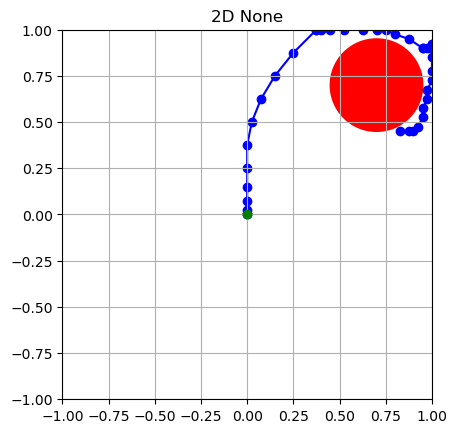

In [6]:
env.plot_trajectory()

Text(0.5, 1.0, 'Steps to reach target')

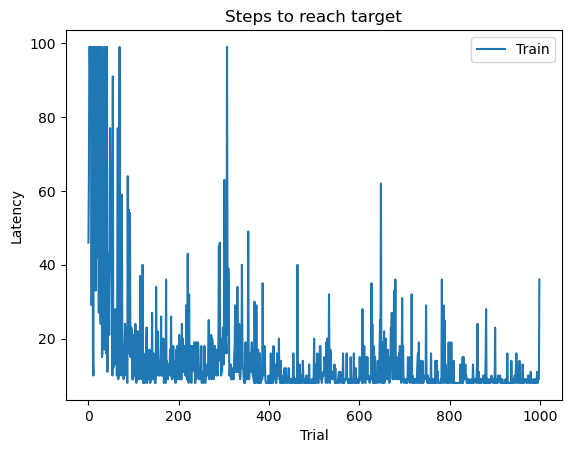

In [7]:
# plot latency to reach goal
plt.figure()
plt.plot(latencys,label='Train')
plt.xlabel('Trial')
plt.ylabel('Latency')
plt.title(f"Steps to reach target")